# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [64]:
df = pd.read_csv('Earthquakes_database.csv')

In [89]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [90]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [91]:
threshold = len(df) * 0.5
df_cleaned = df.dropna(thresh=threshold, axis=1)

In [94]:
df_cleaned = df.drop(columns=['Depth']).copy()

In [95]:
bins = [0, 4, 5, 6, 7, 10]

In [96]:
labels = ['Minor', 'Light', 'Moderate', 'Strong', 'Major']

In [97]:
df_cleaned.loc[:, 'Magnitude_Category'] = pd.cut(df_cleaned['Magnitude'], bins=bins, labels=labels)

In [98]:
print(df_cleaned[['Magnitude', 'Magnitude_Category']].head())

   Magnitude Magnitude_Category
0        6.0           Moderate
1        5.8           Moderate
2        6.2             Strong
3        5.8           Moderate
4        5.8           Moderate


In [102]:
pivot_table = df_cleaned.pivot_table(values='Magnitude', index='Year', columns='Month', aggfunc='mean')

In [104]:
melted_df = df_cleaned.melt(id_vars=['Year', 'Month', 'Day'], value_vars=['Magnitude', 'Depth'])

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Depth']"

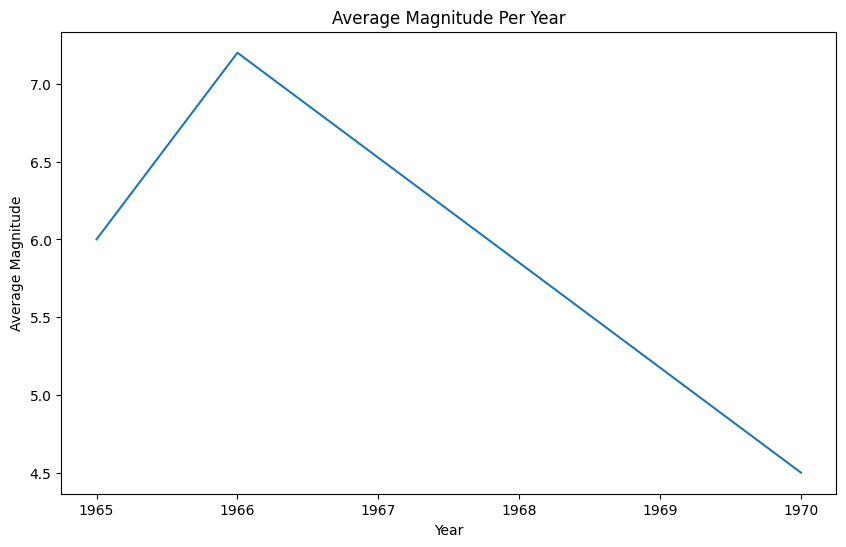

In [107]:
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Year')['Magnitude'].mean().plot(kind='line', title='Average Magnitude Per Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.show()

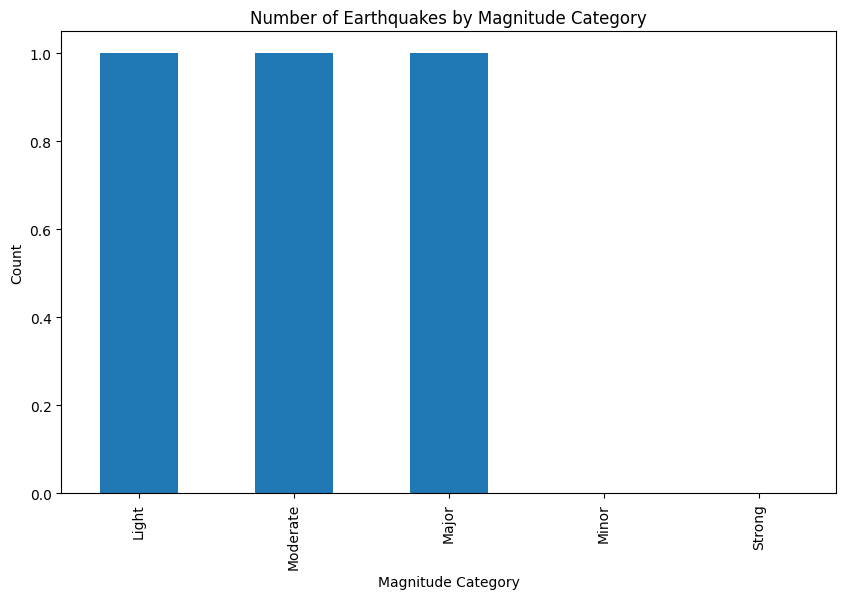

In [108]:
plt.figure(figsize=(10, 6))
df_cleaned['Magnitude_Category'].value_counts().plot(kind='bar', title='Number of Earthquakes by Magnitude Category')
plt.xlabel('Magnitude Category')
plt.ylabel('Count')
plt.show()

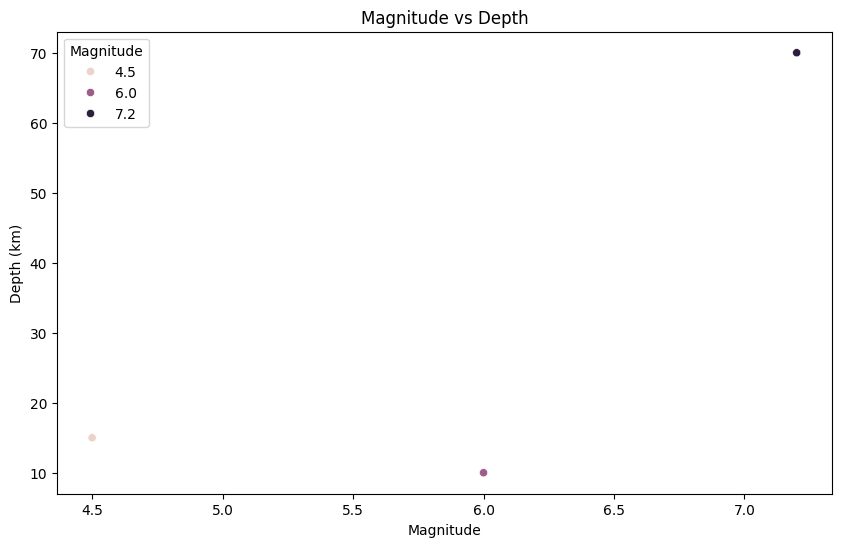

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Magnitude', y='Depth', hue='Magnitude')
plt.title('Magnitude vs Depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.show()

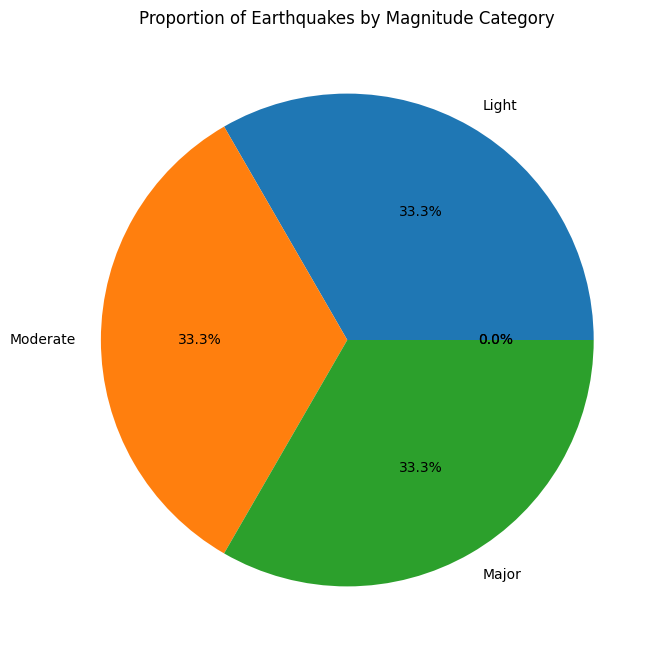

In [110]:
plt.figure(figsize=(8, 8))
df_cleaned['Magnitude_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Proportion of Earthquakes by Magnitude Category')
plt.ylabel('')
plt.show()

In [112]:
df_cleaned.set_index('Date', inplace=True)
yearly_counts = df_cleaned.resample('Y').size()

KeyError: "None of ['Date'] are in the columns"

In [116]:
print("\nYearly Counts of Earthquakes:")
print(yearly_counts.head())


Yearly Counts of Earthquakes:
Date
1965-12-31    1
1966-12-31    1
1967-12-31    0
1968-12-31    0
1969-12-31    0
Freq: YE-DEC, dtype: int64


In [114]:
df_cleaned['Day_of_Week'] = df_cleaned.index.day_name()

In [115]:
print("\nDataFrame with Day of Week Column:")
print(df_cleaned[['Day_of_Week']].head())


DataFrame with Day of Week Column:
           Day_of_Week
Date                  
1965-02-03   Wednesday
1966-05-20      Friday
1970-11-10     Tuesday
